In [16]:
# lista katalogow

import os

#path = "/work/vela/oca/fits/zb08/raw"
path = "/work/vela/oca/fits/zb08/processed-ofp/science"
noce = [d for d in os.listdir(path) if (os.path.isdir(path+"/"+d) and not os.path.islink(path+"/"+d) )]

noce = sorted(noce)

print(noce)

['0168', '0169', '0170', '0171', '0172', '0173', '0174', '0175', '0176', '0177', '0178', '0179', '0180', '0181', '0182', '0183', '0184', '0185', '0186', '0187', '0188', '0189', '0191', '0193', '0194', '0195', '0196', '0197', '0198', '0199', '0200', '0201', '0202', '0203', '0205', '0208', '0209', '0210', '0211', '0214', '0215', '0216', '0217', '0219', '0231', '0232', '0233', '0234', '0236', '0237', '0238', '0239', '0241', '0242', '0243', '0248', '0249', '0250', '0251', '0252', '0253', '0254', '0255', '0256', '0257', '0258', '0260', '0261', '0262', '0263', '0264', '0265', '0266', '0267', '0268', '0269', '0270', '0271', '0272', '0273', '0275', '0276', '0277', '0278', '0279', '0280', '0281', '0282', '0283', '0284', '0287', '0288', '0289', '0290', '0291', '0292', '0293', '0294', '0295', '0296', '0297', '0298', '0299', '0300', '0301', '0302', '0303', '0304', '0306', '0307', '0308', '0309', '0310', '0311', '0312', '0313', '0314', '0315', '0316', '0318', '0319', '0320', '0321', '0322', '0323',

In [17]:
fits_list = []
for night in noce[-30:]:
    for f in os.listdir(path+"/"+night):
        if os.path.isfile(path+"/"+night+"/"+f+"/"+f+".fits"):
            fits_list.append(path+"/"+night+"/"+f+"/"+f+"_zdf.fits")

print(len(fits_list))


23498


In [18]:
from astropy.time import Time
import ephem

oca = ephem.Observer()
oca.lon = str(-70.1963)
oca.lat = str(-24.598)
oca.elev = 2817
oca.horizon = "0"


moon = ephem.Moon()








In [20]:
from astropy.io import fits
import numpy as np
from tqdm.notebook import tqdm


points = []

for f_name in tqdm(fits_list):
    tmp = {}
    hdul = fits.open(f_name)
    data = hdul[0].data
    hdr = hdul[0].header
    hdul.close()

    tlo = np.median(data)/float(hdr["EXPTIME"])

    star = ephem.FixedBody()
    star._ra = np.radians(hdr["RA"])
    star._dec = np.radians(hdr["DEC"])

    oca.date = hdr["DATE-OBS"].replace("T", " ")

    moon.compute(oca)
    star.compute(oca)
    phase = float(moon.phase)
    sep = ephem.separation(star,moon) * 180/ephem.pi

    tmp["alt"] = float(hdr["ALT_TEL"])
    tmp["az"] = float(hdr["AZ_TEL"])
    tmp["temp"] = float(hdr["T-CAM"])
    tmp["filter"] = hdr["FILTER"]
    tmp["date"] = hdr["DATE-OBS"]
    tmp["moon_phase"] = phase
    tmp["moon_dist"] = sep
    tmp["tlo"] = tlo

    #if tlo>100:
    #    print(f_name, tmp)
    #print(tmp)
    points.append(tmp)


  0%|          | 0/23498 [00:00<?, ?it/s]

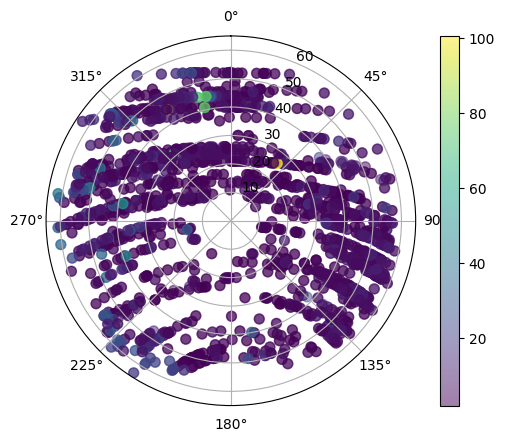

In [42]:
import matplotlib.pyplot as plt

#pt = [ p for p in points if p["filter"] == "Ic" and p["moon_dist"] > 35  and p["moon_phase"] < 50 ]
pt = [ p for p in points if p["filter"] == "i" and p["tlo"] > 0 ]



th = np.radians([p["az"] for p in pt])
r = [90 - p["alt"] for p in pt]
val = [p["tlo"] for p in pt]

fig, ax = plt.subplots(subplot_kw={"projection":"polar"})
c = ax.scatter(th,r,c=val, s=50,alpha=0.5)


ax.set_ylim(0,65)
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)

fig.colorbar(c, ax=ax)

plt.show()